In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
from tb import *

In [4]:
#carga dispositivos y muestra sus "columnas" o "keys"  disponibles
tb = TB(config_file='config_gbv.ini',device_name='CO2')
sn = TB(config_file='config_gbv.ini',device_name='SEN')


CO2 ["CDM4160","CJMCU-811","CJMCU811","Humedad","Temperatura","cjmcu","eco2","etvoc"]
SEN ["co2ppm","lm35","ntc10k","ntc10k_R","sen0219","tmp36","uptime"]


In [7]:
# carga los datos de cada key del respectivo 
sen = sn.get_df(key="sen0219")
cdm = tb.get_df(key="CDM4160")
cjm = tb.get_df(key="cjmcu")


In [17]:
datos = pd.concat([cdm,cjm,sen],axis=1)
sensores = datos.columns
sensores

Index(['CDM4160', 'cjmcu', 'sen0219'], dtype='object')

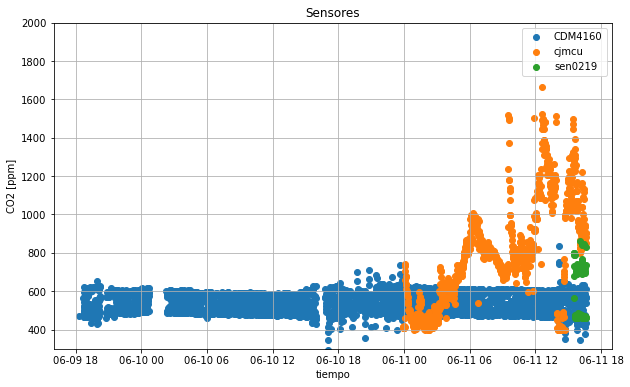

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

# fecha1 = parse("2021-06-10") 
# fecha2 = fecha1 + pd.Timedelta("1D")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,2000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor)

ax.legend()



In [25]:
datos.to_csv("../data/sensores.csv")